# Tutorial ROC curves and Contingency Tables

Learning Outcomes
* Calculate the sensitivity and specificty from a contingency table
* Understand how to use a cut-off threshold to create alternative contingency tables (confusion matrices)
* Create a simple ROC curve
* Analyse a contingency table to test if there is an association bewteen categorical variables.

In [1]:
%reset
# Importing Necessary Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
# Importing Necessary Libraries
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay
from sklearn.metrics import plot_confusion_matrix 

Suppose an program used to predict if an object is identified as a tulip or a rose.  We will predict if an outcome is a tulip (coded here as 1) or is a rose (coded here as 0) and then count the correct and incorrect outcomes. We now have a confusion matrix or contingency table.     

y_pred=[0,1,0,1,1,0,0,1,0,0] \
y_expected=[1,1,0,1,0,0,0,1,1,0]

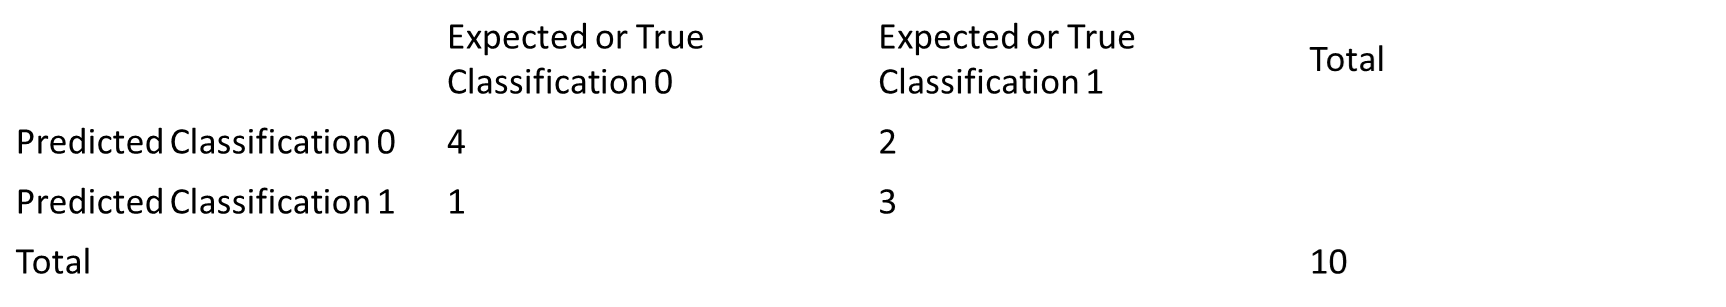

We can look at this using python.

[[4 1]
 [2 3]]


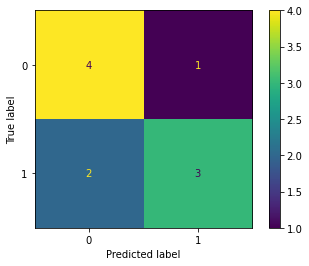

In [3]:
y_pred=[0,1,0,1,1,0,0,1,0,0]
y_expected=[1,1,0,1,0,0,0,1,1,0]
print(confusion_matrix(y_expected,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_expected,y_pred)).plot()

# Now calculate the sensitivity and specificity of the contingency table and graph it in python for this one threshold.
Now calculate the sensitivity and specificty of the contingency table. 

sensitivity = True Positive / (True Positive +False Negative) = True Positive / Ground Truth Positives = True Positive Rate = Recall

specificfy = True Negative / (True Negative + False Positive) = True Negative / Ground Truth Negatives = True Negative Rate

False Positive Rate = 1 - specificity = 

You can then plot these values for a one threshold value for a ROC curve in python.

You can use python and the sklearn library to find these values and then plot them simply as a ROC curve.  The area under the curve (AUC) is a measure of the ability of the predictor to distinguish betweeen the classes (or make an accurate diagnostic test) and is used as a summary of the ROC curve.  The higher the AUC the better the performace of the test.

In [4]:
# graph the value for a simple ROC curve



[0.  0.2 1. ]
[0.  0.6 1. ]
(3,)
0.7000000000000002


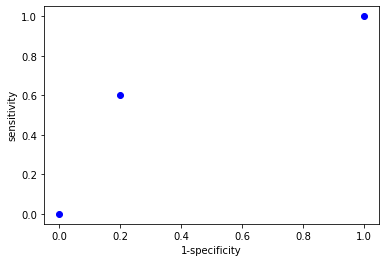

In [5]:
from sklearn.metrics import roc_auc_score
fpr,tpr,_= roc_curve(y_expected,y_pred)
print(fpr)
print(tpr)
print(fpr.shape)
plt.plot(fpr,tpr,'bo')
plt.xlabel("1-specificity")
plt.ylabel("sensitivity")
roc_auc=metrics.auc(fpr,tpr)
print(roc_auc)

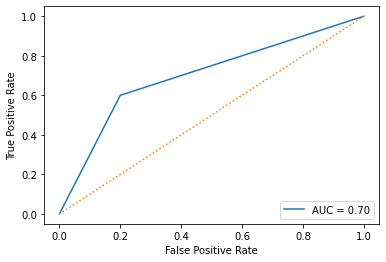

In [11]:
metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.plot([0,1],[0,1],linestyle=':')

# Chi-Square tests for 2x2 tables

In [12]:
import scipy
from scipy import stats
from scipy.stats import norm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Example:  Study investigating the effectiveness of bicycle helmets in preventing head injury, among 793 people who were involved in a bicycle accident within a year time. 
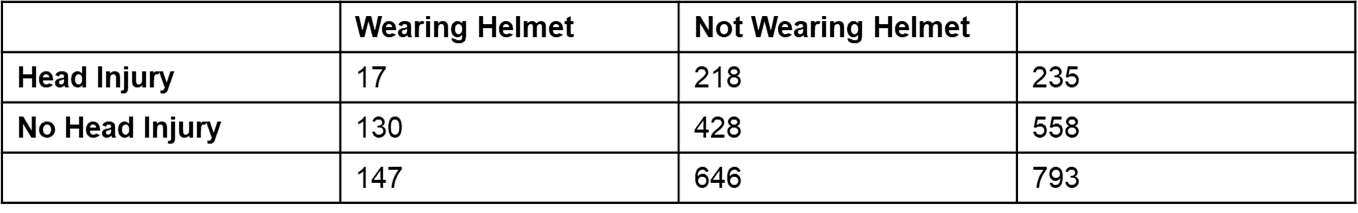

You can use chi2_contingency in scipy stats or work this out by hand, to find the observed and expected value and the Chi square statistic and associated p-value.

# work out the Chi-square statistic by hand:
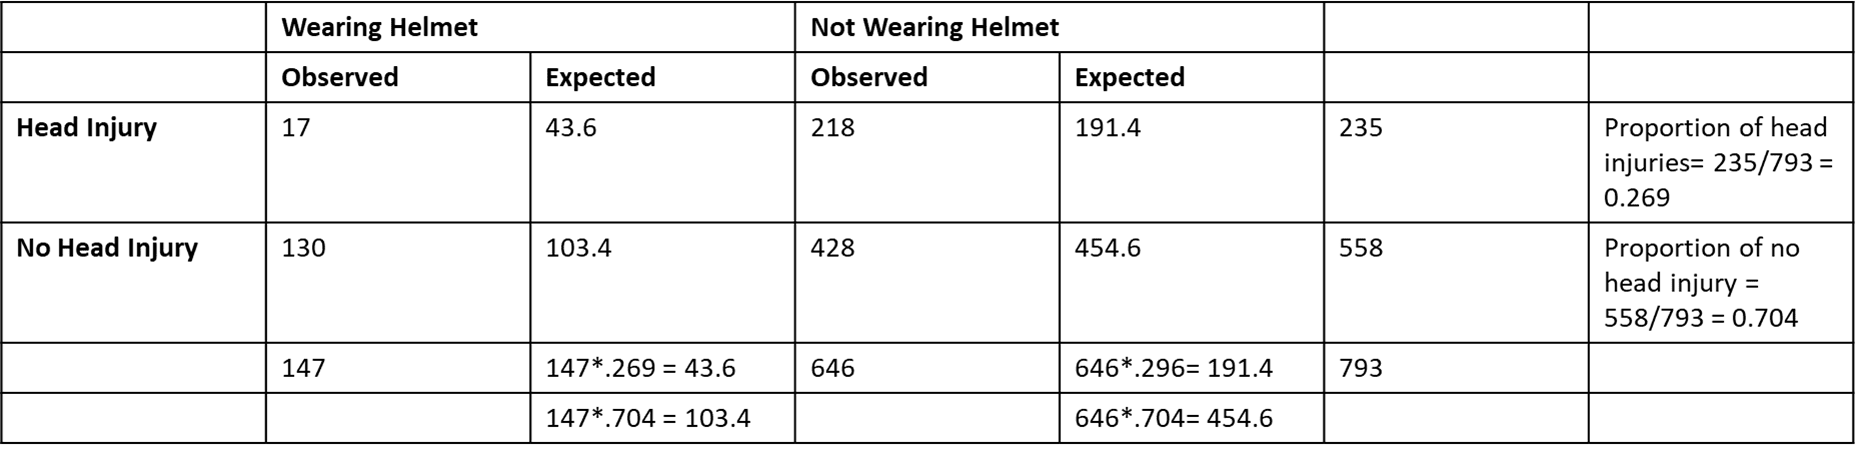

Chi-squared= 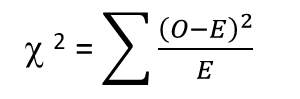

In [13]:
from scipy.stats import chi2_contingency
obs=np.array([[17,218],[130,428]])
chi2_contingency(obs,correction=False)

(28.255497965380403,
 1.0631223606250481e-07,
 1,
 array([[ 43.56242119, 191.43757881],
        [103.43757881, 454.56242119]]))

For a chi-sqaure distribution of a 2x2 table, the dof=1.  Find the probability at this test statistic.

In [14]:
1-stats.chi2.cdf(28.2555,df=1)

1.0631212432610226e-07

You can also find the fisher's exact p-value and the odds ratio directly through python scipy stats. 

In [15]:
from scipy.stats import fisher_exact
table=np.array([[17,218],[130,428]])
oddsr, p = fisher_exact(table,alternative='two-sided')
p

2.2731829357274285e-08

In [16]:
oddsr

0.2567395906845448